In [1]:
# seeds for reproducibility // everytime we run neural network generates random values so to prevent that we seed it
import numpy as np
np.random.seed(0)

import random
random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

import pandas as pd
import seaborn as sns
import random

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshh21","key":"a2ae428b98ebadf82ed5c18961c17cd0"}'}

In [4]:
kaggle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:11<00:00, 180MB/s]
100% 2.04G/2.04G [00:11<00:00, 191MB/s]


In [6]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [7]:
# Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
  zipObj.extractall()

In [8]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

# Number of classes are 38

['grayscale', 'segmented', 'color']
38
['Tomato___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Apple___Black_rot', 'Squash___Powdery_mildew']
38
['Tomato___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Apple___Black_rot', 'Squash___Powdery_mildew']
38
['Tomato___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Apple___Black_rot', 'Squash___Powdery_mildew']


In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['c839e134-6692-4065-8e12-7ea01adcc794___Mt.N.V_HL 9014.JPG', '4c6ad9f3-43b4-4d79-b17a-1707e42ddef5___Mt.N.V_HL 8968.JPG', 'bdbd53ee-405b-4ebc-9027-1adb40940e56___Mt.N.V_HL 8912.JPG', '8e9f476c-e7ea-496e-a367-d384d1be2654___Mt.N.V_HL 8995.JPG', 'a5f23bc2-240d-4db0-8998-43a2cf2a0752___Mt.N.V_HL 6166.JPG']


In [10]:
data = '/content/plantvillage dataset/color'

def create_df(data):
  filepaths = []
  labels = []

  folds = os.listdir(data)
  for fold in folds:
    fold_path = os.path.join(data, fold)
    imgs = os.listdir(fold_path)
    for img in imgs:
      img_path = os.path.join(fold_path, img)
      filepaths.append(img_path)
      labels.append(fold)

  fseries = pd.Series(filepaths, name='Filepaths')
  lseries = pd.Series(labels, name='Labels')

    # Concatenate into a DataFrame and return
  return pd.concat([fseries, lseries], axis=1)


df = create_df(data)

In [11]:
df.head()

,Filepaths,Labels
0,/content/plantvillage dataset/color/Tomato___h...,Tomato___healthy
1,/content/plantvillage dataset/color/Tomato___h...,Tomato___healthy
2,/content/plantvillage dataset/color/Tomato___h...,Tomato___healthy
3,/content/plantvillage dataset/color/Tomato___h...,Tomato___healthy
4,/content/plantvillage dataset/color/Tomato___h...,Tomato___healthy


In [12]:
df.tail()

,Filepaths,Labels
54300,/content/plantvillage dataset/color/Corn_(maiz...,Corn_(maize)___Northern_Leaf_Blight
54301,/content/plantvillage dataset/color/Corn_(maiz...,Corn_(maize)___Northern_Leaf_Blight
54302,/content/plantvillage dataset/color/Corn_(maiz...,Corn_(maize)___Northern_Leaf_Blight
54303,/content/plantvillage dataset/color/Corn_(maiz...,Corn_(maize)___Northern_Leaf_Blight
54304,/content/plantvillage dataset/color/Corn_(maiz...,Corn_(maize)___Northern_Leaf_Blight


In [13]:
df.shape

(54305, 2)

In [14]:
print("The classes:\n", np.unique(df['Labels']))

The classes:
 ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'


In [15]:
class_counts = df['Labels'].value_counts()
print(class_counts)

Labels
Orange___Haunglongbing_(Citrus_greening)              5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus                5357
Soybean___healthy                                     5090
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2127
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1478
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1383
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot                                

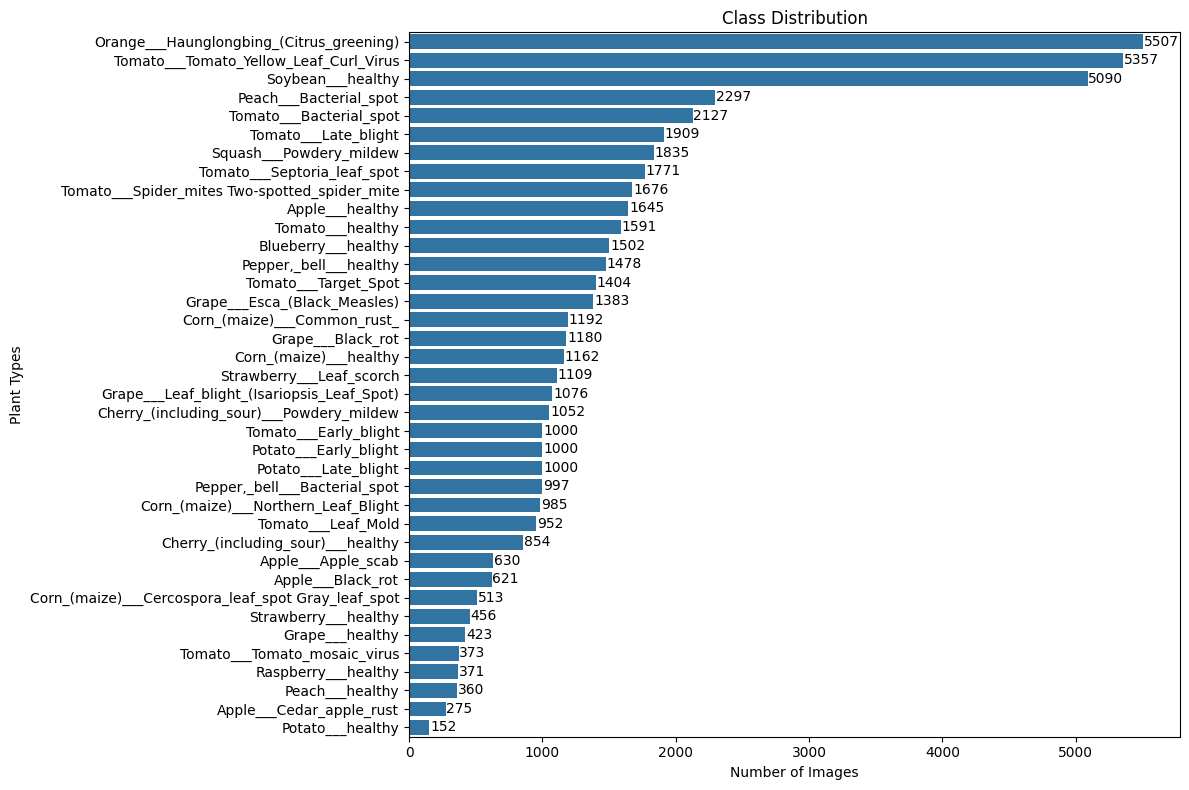

In [16]:
# Visualize class distribution using horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Add data labels to each bar
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [18]:
train_df.shape

(34755, 2)

In [19]:
test_df.shape

(10861, 2)

In [20]:
val_df.shape

(8689, 2)

(256, 256, 3)


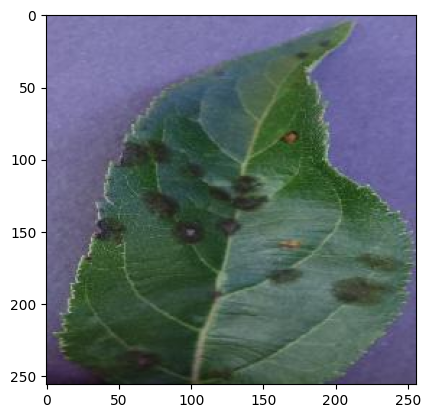

In [21]:
img_path = '/content/plantvillage dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
img = mpimg.imread(img_path)
print(img.shape)

plt.imshow(img)

In [22]:
img_size = 224
batch_size = 32

In [23]:
# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation and test
test_datagen = ImageDataGenerator(rescale=1./255)

# Create flow_from_dataframe generators for train, validation, and test
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42
)

test_generator =  test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42
)

Found 34755 validated image filenames belonging to 38 classes.
Found 8689 validated image filenames belonging to 38 classes.
Found 10861 validated image filenames belonging to 38 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , Activation , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , Adamax
# from tensorflow.keras import regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image as keras_image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import Xception

In [25]:
# importing the Xception model
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3),
    pooling = 'avg'
)

model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,403,982 (81.65 MB)

 Trainable params: 21,345,358 (81.43 MB)

 Non-trainable params: 58,624 (229.00 KB)

In [27]:
model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy' , metrics= ['accuracy'])

In [28]:
history = model.fit(x = train_generator , validation_data = valid_generator , epochs = 5, verbose=1,validation_steps=False, shuffle=False)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 733s 616ms/step - accuracy: 0.8164 - loss: 0.7441 - val_accuracy: 0.9721 - val_loss: 0.0873
Epoch 2/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 649s 597ms/step - accuracy: 0.9686 - loss: 0.1075 - val_accuracy: 0.9776 - val_loss: 0.0842
Epoch 3/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 673s 589ms/step - accuracy: 0.9803 - loss: 0.0646 - val_accuracy: 0.9854 - val_loss: 0.0520
Epoch 4/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 638s 587ms/step - accuracy: 0.9858 - loss: 0.0517 - val_accuracy: 0.9850 - val_loss: 0.0601
Epoch 5/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 640s 589ms/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.9914 - val_loss: 0.0329


In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

340/340 ━━━━━━━━━━━━━━━━━━━━ 51s 150ms/step - accuracy: 0.9905 - loss: 0.0391
Test Accuracy: 0.9892275333404541


In [30]:
test_predictions = model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true labels for the test set
test_true_labels = test_generator.classes

# Create a DataFrame for analysis
error_df = pd.DataFrame({'True Label': test_true_labels, 'Predicted Label': test_predicted_labels})

# Misclassified images
misclassified_images = error_df[error_df['True Label'] != error_df['Predicted Label']]

340/340 ━━━━━━━━━━━━━━━━━━━━ 49s 138ms/step


In [31]:
class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['Labels']))}
df['Labels'] = df['Labels'].map(class_labels_dict)

<function matplotlib.pyplot.show(close=None, block=None)>

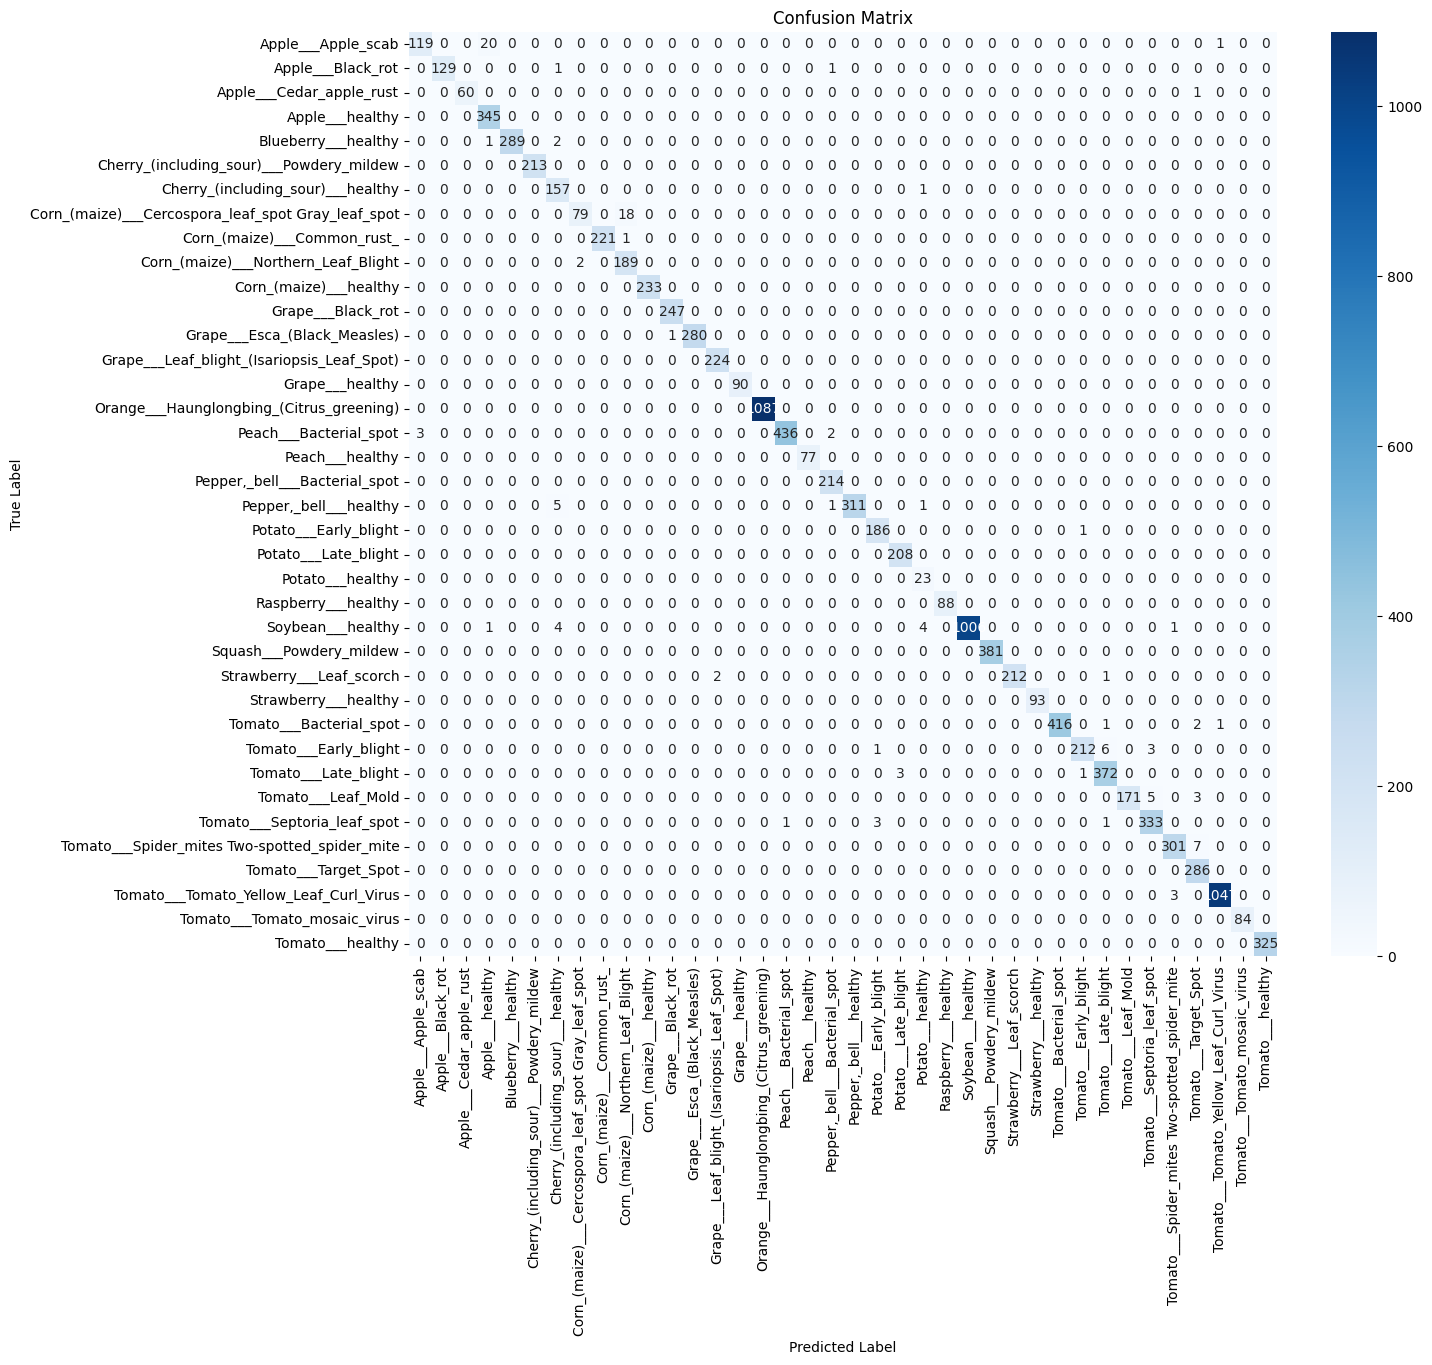

In [32]:
# Confusion Matrix and Classification Report
plt.figure(figsize=(14, 12))
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
class_names = list(class_labels_dict.keys())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [33]:
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.85      0.91       140
                                 Apple___Black_rot       1.00      0.98      0.99       131
                          Apple___Cedar_apple_rust       1.00      0.98      0.99        61
                                   Apple___healthy       0.94      1.00      0.97       345
                               Blueberry___healthy       1.00      0.99      0.99       292
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       213
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       158
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.81      0.89        97
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       222
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

In [34]:
# Unfreeze more layers in the Xception model
n = 40
for layer in model.layers[:-n]:
    layer.trainable = True

# Adjust the learning rate for fine-tuning
learning_rate_finetune = 0.00001

# Compile the model with the updated learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate_finetune), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tuning
epochs_finetune = 5
history_finetune = model.fit(train_generator, epochs=epochs_finetune, validation_data=valid_generator)

Epoch 1/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 709s 609ms/step - accuracy: 0.9934 - loss: 0.0226 - val_accuracy: 0.9960 - val_loss: 0.0125
Epoch 2/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 699s 586ms/step - accuracy: 0.9962 - loss: 0.0106 - val_accuracy: 0.9967 - val_loss: 0.0122
Epoch 3/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 681s 584ms/step - accuracy: 0.9971 - loss: 0.0093 - val_accuracy: 0.9967 - val_loss: 0.0118
Epoch 4/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 682s 584ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9969 - val_loss: 0.0117
Epoch 5/5
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 676s 580ms/step - accuracy: 0.9981 - loss: 0.0069 - val_accuracy: 0.9969 - val_loss: 0.0105


In [35]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

340/340 ━━━━━━━━━━━━━━━━━━━━ 47s 139ms/step - accuracy: 0.9981 - loss: 0.0079
Test Loss: 0.010830171406269073, Test Accuracy: 0.9972378015518188


In [ ]:
# Confusion Matrix and Classification Report
plt.figure(figsize=(14, 12))
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
class_names = list(class_labels_dict.keys())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [37]:
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.85      0.91       140
                                 Apple___Black_rot       1.00      0.98      0.99       131
                          Apple___Cedar_apple_rust       1.00      0.98      0.99        61
                                   Apple___healthy       0.94      1.00      0.97       345
                               Blueberry___healthy       1.00      0.99      0.99       292
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       213
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       158
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.81      0.89        97
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       222
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

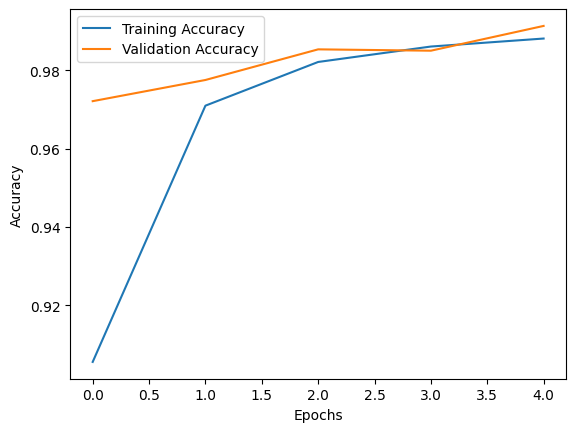

In [38]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

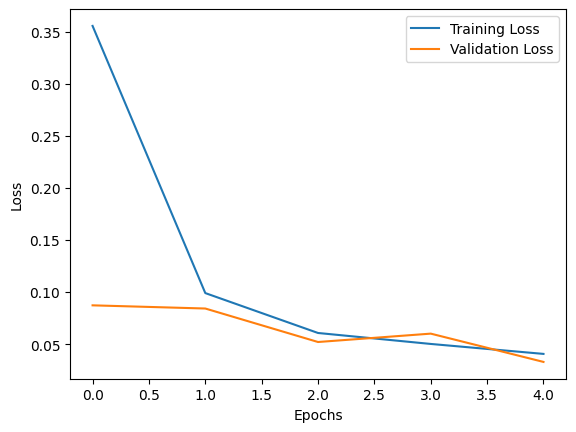

In [39]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
class_indices = train_generator.class_indices
print(class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [41]:
# saving the class name as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [42]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((img_size, img_size))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

def predict_image_class(model, image_path, class_indices):
    processed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(processed_image)  # Probability values for all classes
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_indices[str(predicted_class_index)]  # Convert index to class name
    return predicted_class_name

In [46]:
# Example Usage
image_path = '/content/plantvillage dataset/color/Peach___healthy/0598c367-7200-4f61-af7b-eddb6bf99e55___Rutg._HL 3737.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


KeyError: '17'

In [44]:
# saving the model
model.save('plant_disease_prediction1.h5')

In [45]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning /Plant Disease Prediciton/plant_disease_precition.h5')